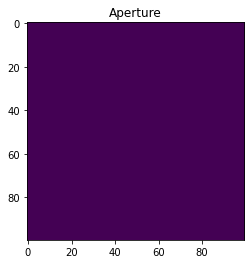

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def hexagon(radius):
    angle = np.linspace(0, 2 * np.pi, 7)
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    return np.vstack((x, y)).T

def generate_hexagon_aperture(radius, gap, shift_x, shift_y):
    hex_coords = hexagon(radius)
    aperture = np.zeros((2 * radius, 2 * radius))
    
    y, x = np.indices(aperture.shape)
    xy = np.column_stack((x.ravel(), y.ravel()))
    
    for y_offset in range(-1, 2):
        for x_offset in range(-1, 2):
            coords = hex_coords + [radius + x_offset * shift_x + y_offset * shift_x / 2, radius + y_offset * shift_y]
            dists = distance.cdist(xy, coords)
            min_dists = dists.min(axis=1)
            hex_mask = (min_dists <= radius).reshape(aperture.shape)
            aperture = np.logical_or(aperture, hex_mask)

    return aperture.astype(int)

def main():
    segment_radius = 50
    gap = 2
    shift_x = 2 * segment_radius - gap
    shift_y = 1.5 * segment_radius - gap / 2
    aperture = generate_hexagon_aperture(segment_radius, gap, shift_x, shift_y)

    plt.imshow(aperture)
    plt.title('Aperture')
    plt.show()

if __name__ == "__main__":
    main()
